# Relatório de Indicadores de Performance da Northwind Traders
## Arthur do Prado Labaki

#### Este relatório tem como objetivo apresentar uma análise detalhada dos indicadores de desempenho da Northwind Traders, fornecendo informações valiosas para impulsionar a eficiência operacional e a tomada de decisões estratégicas. 
#### Com a crescente complexidade das operações da empresa e a necessidade de uma visão integrada de seus dados, esta análise busca responder às demandas da Northwind, contribuindo para o crescimento sustentável e o alcance dos objetivos estratégicos estabelecidos pelo CEO, Tony Stark. 
#### Através da análise dos dados contidos nas 14 tabelas do ERP da Northwind, este relatório irá destacar indicadores chave de desempenho, explorar tendências e padrões relevantes, e propor ações específicas para melhorar os resultados da empresa.

#### Caso seja necessário, o link abaixo leva ao meu GitHub, onde você pode encontrar o relatório em formato PDF, sem os códigos. Isso pode facilitar a sua compreensão.
#### [Link para o repositório](https://github.com/ArthurLabaki/desafio-northwind)

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

In [105]:
# Carregar os dados
df_tabela1 = pd.read_csv('Dados/categories.csv', sep=';')
df_tabela2 = pd.read_csv('Dados/customer_customer_demo.csv', sep=';')
df_tabela3 = pd.read_csv('Dados/customer_demographics.csv', sep=';')
df_tabela4 = pd.read_csv('Dados/customers.csv', sep=';')
df_tabela5 = pd.read_csv('Dados/employee_territories.csv', sep=';')
df_tabela6 = pd.read_csv('Dados/employees.csv', sep=';')
df_tabela7 = pd.read_csv('Dados/order_details.csv', sep=';')
df_tabela8 = pd.read_csv('Dados/orders.csv', sep=';')
df_tabela9 = pd.read_csv('Dados/products.csv', sep=';')
df_tabela10 = pd.read_csv('Dados/region.csv', sep=';')
df_tabela11 = pd.read_csv('Dados/shippers.csv', sep=';')
df_tabela12 = pd.read_csv('Dados/suppliers.csv', sep=';')
df_tabela13 = pd.read_csv('Dados/territories.csv', sep=';')
df_tabela14 = pd.read_csv('Dados/us_states.csv', sep=';')

In [106]:
def format_currency_brazilian(value):
    formatted_value = f'R$ {value:,.2f}'.replace(',', '*').replace('.', ',').replace('*', '.')
    return formatted_value

In [107]:
def format_decimal(x):
    formatted_value = "R$: {:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")
    return round(x, 2)

# Indicadores Gerais

In [108]:
#locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
num_customers = df_tabela4.shape[0]
num_orders = df_tabela8.shape[0]
order_data = df_tabela8.merge(df_tabela7, on='order_id')

total_products_sold = order_data['quantity'].sum()
total_net_sales = (order_data['quantity'] * order_data['unit_price'] * (1 - order_data['discount'])).sum()
total_gross_profit = (order_data['quantity'] * order_data['unit_price']).sum()
total_products_in_stock = df_tabela9['units_in_stock'].sum()

#total_net_sales_formatted = locale.currency(total_net_sales, grouping=True, symbol=True)
#total_gross_profit_formatted = locale.currency(total_gross_profit, grouping=True, symbol=True)
total_net_sales_formatted = format_currency_brazilian(total_net_sales)
total_gross_profit_formatted = format_currency_brazilian(total_gross_profit)

# Exibir
print("Número de Clientes:", num_customers)
print("Número de Pedidos:", num_orders)
print("Quantidade de Produtos Vendidos:", total_products_sold)
print("Quantidade de Produtos em Estoque:", total_products_in_stock)
print("Receita Bruta Total:", total_gross_profit_formatted)
print("Receita Líquida Total:", total_net_sales_formatted)

Número de Clientes: 91
Número de Pedidos: 830
Quantidade de Produtos Vendidos: 51317
Quantidade de Produtos em Estoque: 3119
Receita Bruta Total: R$ 1.354.458,59
Receita Líquida Total: R$ 1.265.793,04


# Indicadores de Faturamento

In [109]:
employee_order_data = df_tabela6.merge(df_tabela8, left_on='employee_id', right_on='employee_id')
employee_order_data = employee_order_data.merge(df_tabela7, left_on='order_id', right_on='order_id')

employee_sales = (employee_order_data['quantity'] * employee_order_data['unit_price'] * (1 - employee_order_data['discount'])).groupby(employee_order_data['employee_id']).sum().reset_index()
employee_sales = employee_sales.rename(columns={0: 'Venda Líquida'})
employee_sales = employee_sales.merge(df_tabela6, left_on='employee_id', right_on='employee_id')

product_order_data = df_tabela8.merge(df_tabela7, on='order_id')
product_order_data = product_order_data.merge(df_tabela9, on='product_id')
product_order_data = product_order_data.merge(df_tabela1, on='category_id')

category_sales = (product_order_data['quantity'] * product_order_data['unit_price_y'] * (1 - product_order_data['discount'])).groupby(product_order_data['category_name']).sum().reset_index()
category_sales = category_sales.rename(columns={0: 'Venda Líquida'})

shipper_order_data = df_tabela8.merge(df_tabela7, on='order_id')
shipper_order_data = shipper_order_data.merge(df_tabela11, left_on='ship_via', right_on='shipper_id')  # Corrigir a coluna de junção

shipper_sales = (shipper_order_data['quantity'] * shipper_order_data['unit_price'] * (1 - shipper_order_data['discount'])).groupby(shipper_order_data['company_name']).sum().reset_index()
shipper_sales = shipper_sales.rename(columns={0: 'Venda Líquida'})

country_order_data = df_tabela8.merge(df_tabela7, on='order_id')
country_order_data = country_order_data.merge(df_tabela4, on='customer_id')

country_sales = (country_order_data['quantity'] * country_order_data['unit_price'] * (1 - country_order_data['discount'])).groupby(country_order_data['country']).sum().reset_index()
country_sales = country_sales.rename(columns={0: 'Venda Líquida'})

employee_sales = employee_sales.sort_values(by='Venda Líquida', ascending=False)
employee_sales = employee_sales[['first_name', 'last_name', 'Venda Líquida']]

category_sales = category_sales.sort_values(by='Venda Líquida', ascending=False)
shipper_sales = shipper_sales.sort_values(by='Venda Líquida', ascending=False)

country_sales = country_sales.sort_values(by='Venda Líquida', ascending=False)
df_tabela8['order_date'] = pd.to_datetime(df_tabela8['order_date'])
df_tabela8['order_month'] = df_tabela8['order_date'].dt.to_period('M')

df_vendas_mensais = pd.merge(df_tabela7, df_tabela8, on='order_id')
df_vendas_mensais['total_sales'] = df_vendas_mensais['unit_price'] * df_vendas_mensais['quantity'] * (1 - df_vendas_mensais['discount'])

faturamento_mensal = df_vendas_mensais.groupby('order_month')['total_sales'].sum()

employee_sales['Venda Líquida'] = employee_sales['Venda Líquida'].apply(format_decimal)
category_sales['Venda Líquida'] = category_sales['Venda Líquida'].apply(format_decimal)
shipper_sales['Venda Líquida'] = shipper_sales['Venda Líquida'].apply(format_decimal)
country_sales['Venda Líquida'] = country_sales['Venda Líquida'].apply(format_decimal)

# Exibir
print("Receita Líquida por Empregado:")
print(employee_sales)
print("\nReceita Líquida por Categorias de Produtos:")
print(category_sales)
print("\nReceita Líquida por Shippers:")
print(shipper_sales)
print("\nReceita Líquida por País:")
print(country_sales)
print("\nFaturamento Mensal:")
print(faturamento_mensal)

Receita Líquida por Empregado:
  first_name  last_name  Venda Líquida
3   Margaret    Peacock      232890.85
2      Janet  Leverling      202812.84
0      Nancy    Davolio      192107.60
1     Andrew     Fuller      166537.76
7      Laura   Callahan      126862.28
6     Robert       King      124568.24
8       Anne  Dodsworth       77308.07
5    Michael     Suyama       73913.13
4     Steven   Buchanan       68792.28

Receita Líquida por Categorias de Produtos:
    category_name  Venda Líquida
0       Beverages      288694.65
3  Dairy Products      251147.60
2     Confections      179863.65
5    Meat/Poultry      174622.55
7         Seafood      137989.31
1      Condiments      113692.19
6         Produce      105745.71
4  Grains/Cereals      101646.94

Receita Líquida por Shippers:
       company_name  Venda Líquida
2    United Package      533547.63
0  Federal Shipping      383405.47
1    Speedy Express      348839.94

Receita Líquida por País:
        country  Venda Líquida
19      

# Indicadores de Clientes

In [110]:
customer_order_data = df_tabela8.merge(df_tabela7, on='order_id')
customer_order_data = customer_order_data.merge(df_tabela4, on='customer_id')

customers_per_employee = customer_order_data.groupby('employee_id')['customer_id'].nunique().reset_index()
customers_per_employee = customers_per_employee.rename(columns={'customer_id': 'Clientes'})
customers_per_employee = customers_per_employee.sort_values(by='Clientes', ascending=False)
customers_per_employee = customers_per_employee.merge(df_tabela6, on='employee_id')
customers_per_employee = customers_per_employee[['first_name', 'last_name', 'Clientes']]

customer_category_data = df_tabela8.merge(df_tabela7, on='order_id')
customer_category_data = customer_category_data.merge(df_tabela9, on='product_id')
customer_category_data = customer_category_data.merge(df_tabela1, on='category_id')
customer_category_data = customer_category_data.merge(df_tabela4, on='customer_id')

customers_per_category = customer_category_data.groupby('category_name')['customer_id'].nunique().reset_index()
customers_per_category = customers_per_category.rename(columns={'customer_id': 'Clientes'})
customers_per_category = customers_per_category.sort_values(by='Clientes', ascending=False)

customer_shipper_data = df_tabela8.merge(df_tabela7, on='order_id')
customer_shipper_data = customer_shipper_data.merge(df_tabela11, left_on='ship_via', right_on='shipper_id')
customer_shipper_data = customer_shipper_data.merge(df_tabela4, on='customer_id')

customers_per_shipper = customer_shipper_data.groupby('company_name_x')['customer_id'].nunique().reset_index()
customers_per_shipper = customers_per_shipper.rename(columns={'customer_id': 'Clientes'})
customers_per_shipper = customers_per_shipper.sort_values(by='Clientes', ascending=False)

df_tabela8['order_date'] = pd.to_datetime(df_tabela8['order_date'])
df_tabela8['mes_ano'] = df_tabela8['order_date'].dt.to_period('M')

customer_month_data = df_tabela8.merge(df_tabela7, on='order_id')
customer_month_data = customer_month_data.merge(df_tabela4, on='customer_id')

customers_per_month = customer_month_data.groupby('mes_ano')['customer_id'].nunique().reset_index()
customers_per_month = customers_per_month.rename(columns={'customer_id': 'Clientes'})

# Exibir
print("Clientes por Empregado:")
print(customers_per_employee)
print("\nClientes por Categoria de Produtos:")
print(customers_per_category)
print("\nClientes por Shippers:")
print(customers_per_shipper)
print("\nClientes por Mês/Ano:")
print(customers_per_month)

Clientes por Empregado:
  first_name  last_name  Clientes
0   Margaret    Peacock        75
1      Nancy    Davolio        65
2      Janet  Leverling        63
3     Andrew     Fuller        59
4      Laura   Callahan        56
5     Robert       King        45
6    Michael     Suyama        43
7     Steven   Buchanan        29
8       Anne  Dodsworth        29

Clientes por Categoria de Produtos:
    category_name  Clientes
7         Seafood        85
0       Beverages        83
3  Dairy Products        81
2     Confections        80
1      Condiments        69
5    Meat/Poultry        69
4  Grains/Cereals        68
6         Produce        63

Clientes por Shippers:
     company_name_x  Clientes
2    United Package        83
0  Federal Shipping        78
1    Speedy Express        78

Clientes por Mês/Ano:
    mes_ano  Clientes
0   1996-07        20
1   1996-08        18
2   1996-09        19
3   1996-10        20
4   1996-11        21
5   1996-12        25
6   1997-01        27
7   

# Indicadores de Pedidos

In [111]:
orders_employee_data = df_tabela8.merge(df_tabela6, left_on='employee_id', right_on='employee_id')

orders_per_employee = orders_employee_data.groupby(['first_name', 'last_name'])['order_id'].nunique().reset_index()
orders_per_employee = orders_per_employee.rename(columns={'order_id': 'Pedidos'})
orders_per_employee = orders_per_employee.sort_values(by='Pedidos', ascending=False)

orders_product_data = df_tabela8.merge(df_tabela7, on='order_id')
orders_product_data = orders_product_data.merge(df_tabela9, on='product_id')
orders_product_data = orders_product_data.merge(df_tabela1, on='category_id')

orders_per_category = orders_product_data.groupby('category_name')['order_id'].nunique().reset_index()
orders_per_category = orders_per_category.rename(columns={'order_id': 'Pedidos'})
orders_per_category = orders_per_category.sort_values(by='Pedidos', ascending=False)

orders_shipper_data = df_tabela8.merge(df_tabela7, on='order_id')
orders_shipper_data = orders_shipper_data.merge(df_tabela11, left_on='ship_via', right_on='shipper_id')

orders_per_shipper = orders_shipper_data.groupby('company_name')['order_id'].nunique().reset_index()
orders_per_shipper = orders_per_shipper.rename(columns={'order_id': 'Pedidos'})
orders_per_shipper = orders_per_shipper.sort_values(by='Pedidos', ascending=False)

df_tabela8['ano_mes'] = df_tabela8['order_date'].dt.to_period('M')

orders_per_year_month = df_tabela8.groupby('ano_mes')['order_id'].nunique().reset_index()
orders_per_year_month = orders_per_year_month.rename(columns={'order_id': 'Pedidos'})
orders_per_year_month = orders_per_year_month.sort_values(by='ano_mes')

orders_product_supplier_data = df_tabela8.merge(df_tabela7, on='order_id')
orders_product_supplier_data = orders_product_supplier_data.merge(df_tabela9, on='product_id')
orders_product_supplier_data = orders_product_supplier_data.merge(df_tabela12, on='supplier_id')

orders_per_supplier = orders_product_supplier_data.groupby('company_name')['order_id'].nunique().reset_index()
orders_per_supplier = orders_per_supplier.rename(columns={'order_id': 'Pedidos'})
orders_per_supplier = orders_per_supplier.sort_values(by='Pedidos', ascending=False)

# Exibir
print("Pedidos por Empregado:")
print(orders_per_employee)
print("\nPedidos por Categoria de Produtos:")
print(orders_per_category)
print("\nPedidos por Shippers:")
print(orders_per_shipper)
print("\nPedidos por Ano/Mês:")
print(orders_per_year_month)
print("\nPedidos por Supplier CompanyName:")
print(orders_per_supplier)

Pedidos por Empregado:
  first_name  last_name  Pedidos
4   Margaret    Peacock      156
2      Janet  Leverling      127
6      Nancy    Davolio      123
3      Laura   Callahan      104
0     Andrew     Fuller       96
7     Robert       King       72
5    Michael     Suyama       67
1       Anne  Dodsworth       43
8     Steven   Buchanan       42

Pedidos por Categoria de Produtos:
    category_name  Pedidos
0       Beverages      354
3  Dairy Products      303
2     Confections      295
7         Seafood      291
1      Condiments      193
4  Grains/Cereals      182
5    Meat/Poultry      161
6         Produce      129

Pedidos por Shippers:
       company_name  Pedidos
2    United Package      326
0  Federal Shipping      255
1    Speedy Express      249

Pedidos por Ano/Mês:
    ano_mes  Pedidos
0   1996-07       22
1   1996-08       25
2   1996-09       23
3   1996-10       26
4   1996-11       25
5   1996-12       31
6   1997-01       33
7   1997-02       29
8   1997-03       

# Indicadores de Produtos

In [117]:
product_employee_data = df_tabela7.merge(df_tabela8, on='order_id')
product_employee_data = product_employee_data.merge(df_tabela6, left_on='employee_id', right_on='employee_id')

products_per_employee = product_employee_data.groupby([ 'first_name', 'last_name'])['quantity'].sum().reset_index()
products_per_employee = products_per_employee.rename(columns={'quantity': 'Produtos Vendidos'})
products_per_employee = products_per_employee.sort_values(by='Produtos Vendidos', ascending=False)

product_category_data = df_tabela7.merge(df_tabela8, on='order_id')
product_category_data = product_category_data.merge(df_tabela9, on='product_id')
product_category_data = product_category_data.merge(df_tabela1, on='category_id')

products_per_category = product_category_data.groupby('category_name')['quantity'].sum().reset_index()
products_per_category = products_per_category.rename(columns={'quantity': 'Produtos Vendidos'})
products_per_category = products_per_category.sort_values(by='Produtos Vendidos', ascending=False)

product_shipper_data = df_tabela7.merge(df_tabela8, on='order_id')
product_shipper_data = product_shipper_data.merge(df_tabela11, left_on='ship_via', right_on='shipper_id')

products_per_shipper = product_shipper_data.groupby('company_name')['quantity'].sum().reset_index()
products_per_shipper = products_per_shipper.rename(columns={'quantity': 'Produtos Vendidos'})
products_per_shipper = products_per_shipper.sort_values(by='Produtos Vendidos', ascending=False)

df_tabela8['ano_mes'] = df_tabela8['order_date'].dt.to_period('M')
product_year_month_data = df_tabela7.merge(df_tabela8[['order_id', 'ano_mes']], on='order_id')

products_per_year_month = product_year_month_data.groupby('ano_mes')['quantity'].sum().reset_index()
products_per_year_month = products_per_year_month.rename(columns={'quantity': 'Produtos Vendidos'})
products_per_year_month = products_per_year_month.sort_values(by='ano_mes')

order_data4 = df_tabela8.merge(df_tabela7, on='order_id')
order_data4['total_value'] = (order_data4['quantity'] * order_data4['unit_price']) * (1 - order_data4['discount'])

product_total_revenue = order_data4.groupby('product_id')['total_value'].sum().reset_index()
product_total_quantity = order_data4.groupby('product_id')['quantity'].sum().reset_index()

top_products_info4 = product_total_revenue.merge(df_tabela9[['product_id', 'product_name']], on='product_id')
top_products_info4 = top_products_info4.merge(product_total_quantity, on='product_id')

top_products_info_sorted4 = top_products_info4.sort_values(by='total_value', ascending=False)

top10_produtos_quantidade_nomes = top10_produtos_quantidade.merge(df_tabela9[['product_id', 'product_name']], on='product_id')
bot10_produtos_quantidade_nomes = bot10_produtos_quantidade.merge(df_tabela9[['product_id', 'product_name']], on='product_id')

# Exibir
print("Produtos por Empregado:")
print(products_per_employee)
print("\nProdutos por Categoria de Produtos:")
print(products_per_category)
print("\nProdutos por Shippers:")
print(products_per_shipper)
print("\nProdutos por Ano/Mês:")
print(products_per_year_month)
print("\nTop 10 produtos mais vendidos")
print(top10_produtos_quantidade_nomes[['product_name', 'quantity']])
print("\nTop 10 produtos menos vendidos")
print(bot10_produtos_quantidade_nomes[['product_name', 'quantity']])

Produtos por Empregado:
  first_name  last_name  Produtos Vendidos
4   Margaret    Peacock               9798
2      Janet  Leverling               7852
6      Nancy    Davolio               7812
0     Andrew     Fuller               6055
3      Laura   Callahan               5913
7     Robert       King               4654
5    Michael     Suyama               3527
8     Steven   Buchanan               3036
1       Anne  Dodsworth               2670

Produtos por Categoria de Produtos:
    category_name  Produtos Vendidos
0       Beverages               9532
3  Dairy Products               9149
2     Confections               7906
7         Seafood               7681
1      Condiments               5298
4  Grains/Cereals               4562
5    Meat/Poultry               4199
6         Produce               2990

Produtos por Shippers:
       company_name  Produtos Vendidos
2    United Package              19945
1    Speedy Express              15919
0  Federal Shipping              15

# Gráfico dos indicadores Gerais
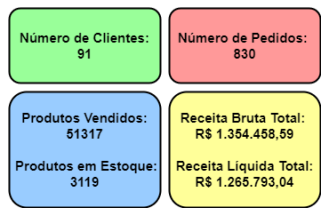

# Gráfico dos indicadores de Clientes

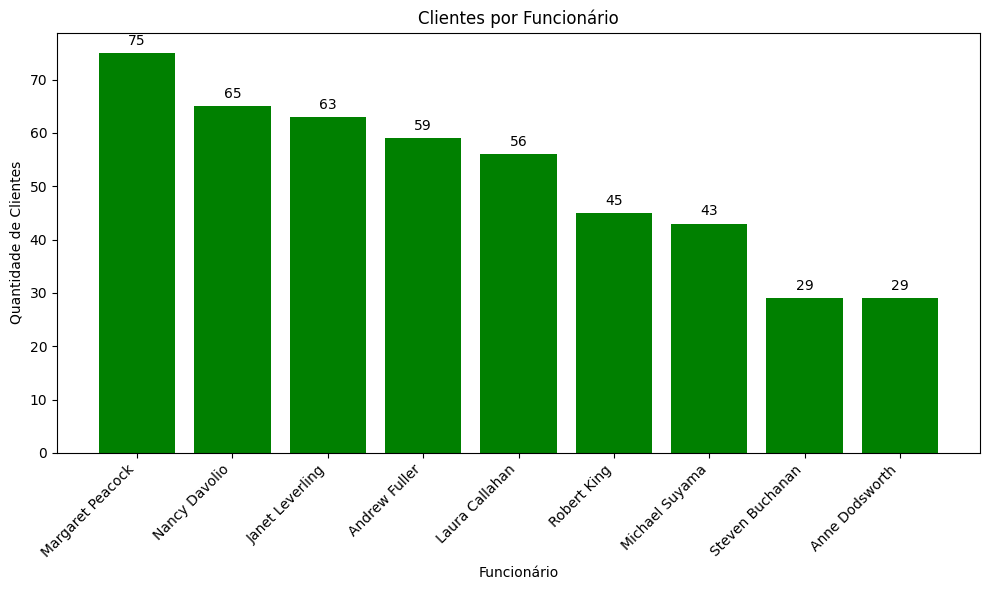

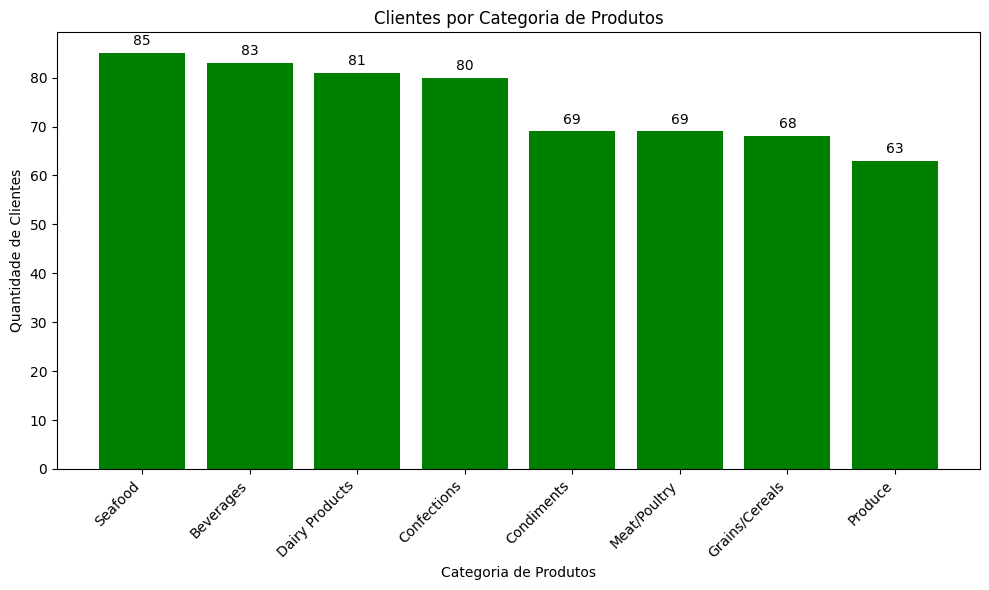

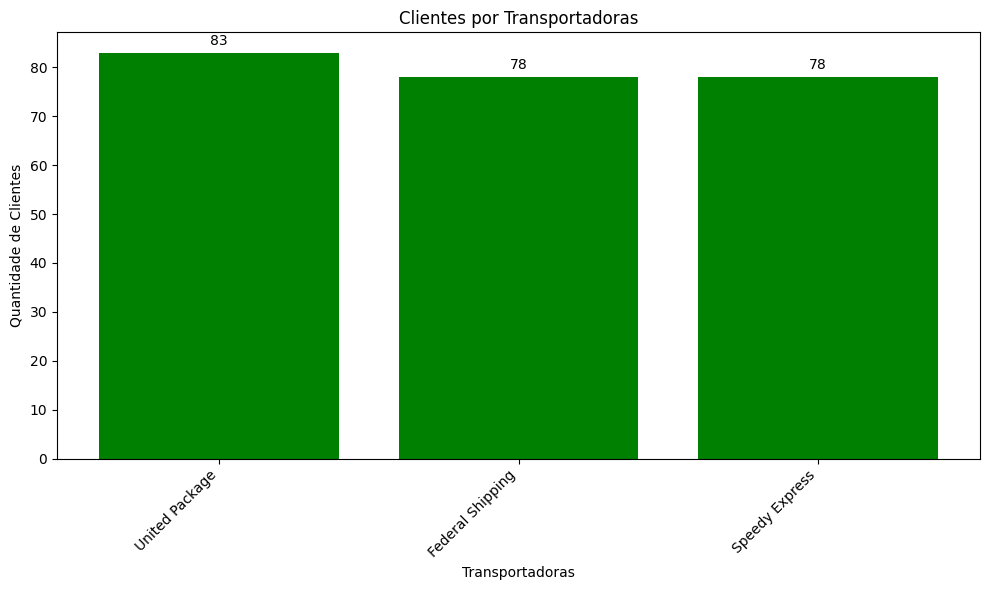

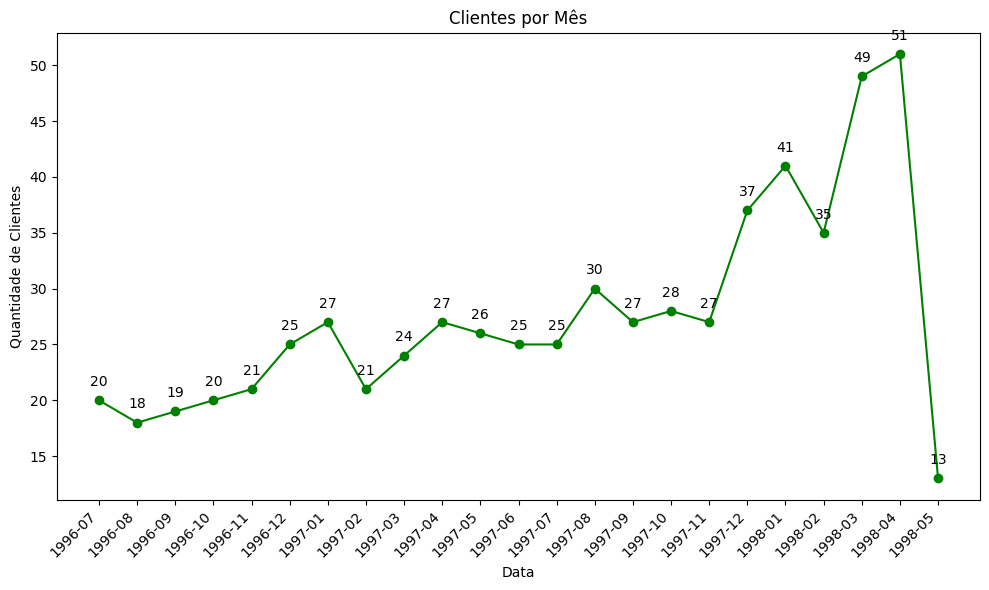

In [113]:
# Tabela de Clientes por Empregado
employees = customers_per_employee['first_name'] + ' ' + customers_per_employee['last_name']
customers_count_employee = customers_per_employee['Clientes']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(employees, customers_count_employee, color='green')
for bar in bars:
    value = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, value + 1, str(value), ha='center', va='bottom')
ax.set_xlabel('Funcionário')
ax.set_ylabel('Quantidade de Clientes')
ax.set_title('Clientes por Funcionário')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Clientes por Categoria de Produtos
categories = customers_per_category['category_name']
customers_count_category = customers_per_category['Clientes']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(categories, customers_count_category, color='green')
for bar in bars:
    value = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, value + 1, str(value), ha='center', va='bottom')
ax.set_xlabel('Categoria de Produtos')
ax.set_ylabel('Quantidade de Clientes')
ax.set_title('Clientes por Categoria de Produtos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Clientes por Transportadoras
shippers = customers_per_shipper['company_name_x']
customers_count_shipper = customers_per_shipper['Clientes']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(shippers, customers_count_shipper, color='green') 
for bar in bars:
    value = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, value + 1, str(value), ha='center', va='bottom')
ax.set_xlabel('Transportadoras')
ax.set_ylabel('Quantidade de Clientes')
ax.set_title('Clientes por Transportadoras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Clientes por Mês/Ano
year_month = customers_per_month['mes_ano'].astype(str)
customers_count_month = customers_per_month['Clientes']
plt.figure(figsize=(10, 6))
plt.plot(year_month, customers_count_month, marker='o', color='green')
plt.xlabel('Data')
plt.ylabel('Quantidade de Clientes')
plt.title('Clientes por Mês')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(customers_count_month):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n\n")

# Gráfico dos indicadores de Pedidos

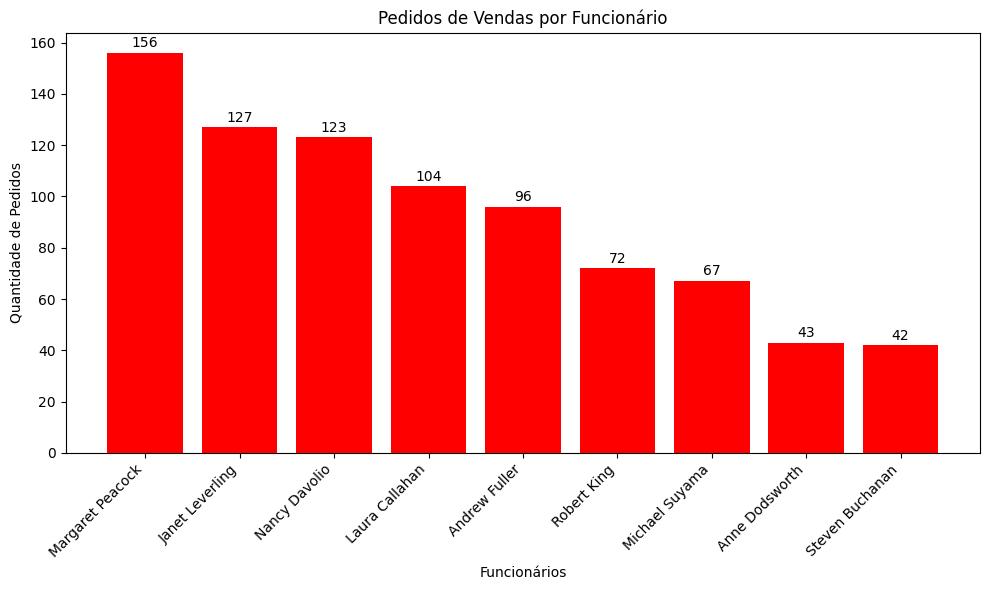

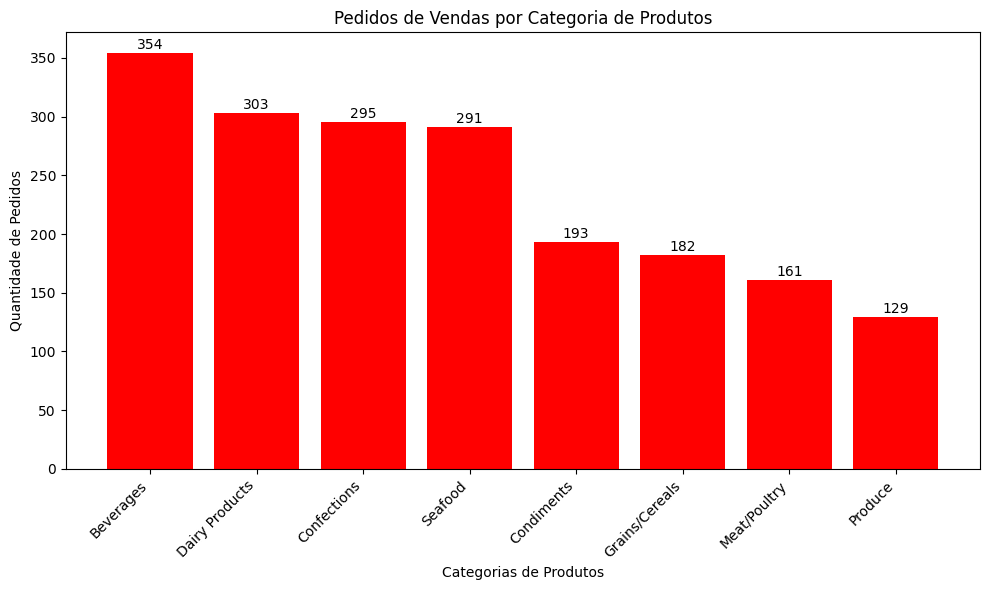

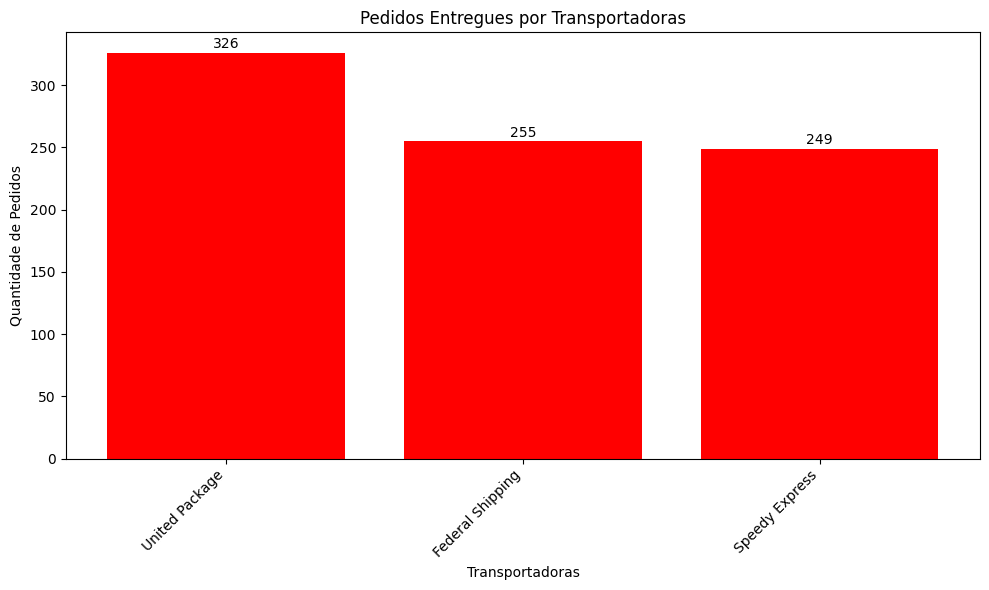

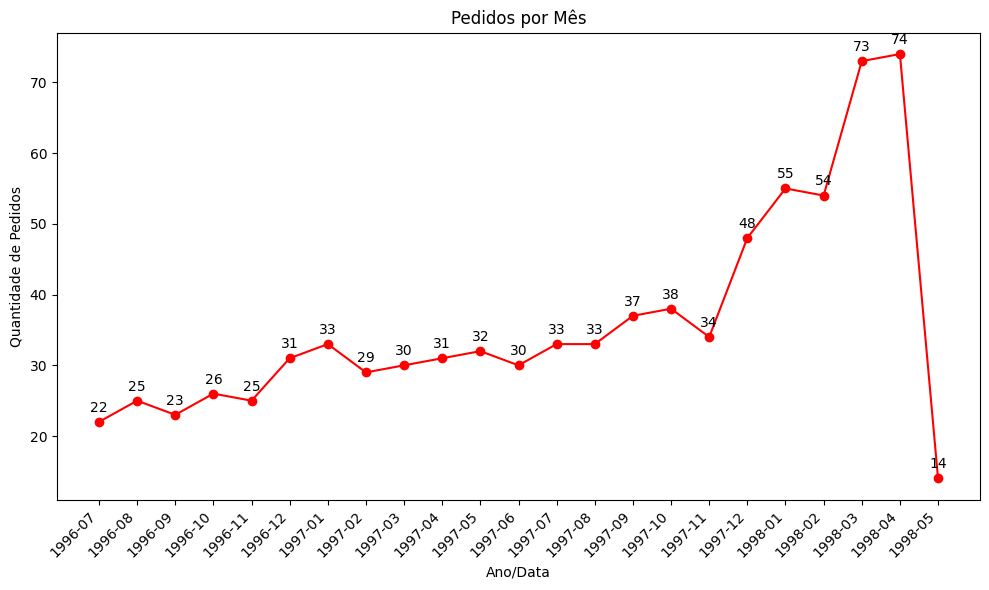

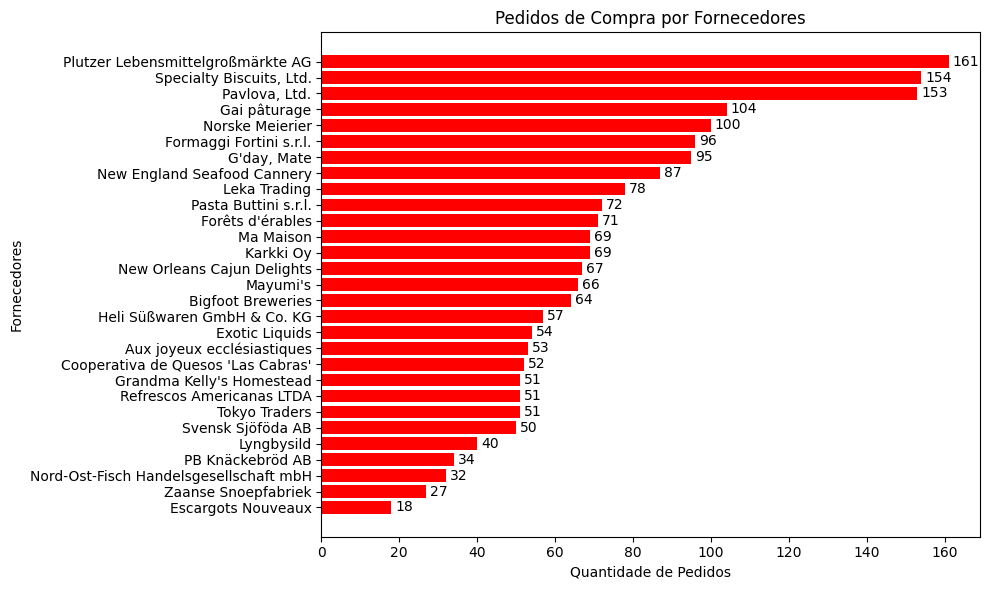

In [114]:
# Tabela de Pedidos por Empregado
employees = orders_per_employee['first_name'] + ' ' + orders_per_employee['last_name']
orders_count = orders_per_employee['Pedidos']
plt.figure(figsize=(10, 6))
plt.bar(employees, orders_count, color='red')
plt.xlabel('Funcionários')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos de Vendas por Funcionário')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(orders_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Pedidos por Categoria de Produtos
categories = orders_per_category['category_name']
orders_count = orders_per_category['Pedidos']
plt.figure(figsize=(10, 6))
plt.bar(categories, orders_count, color='red')
plt.xlabel('Categorias de Produtos')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos de Vendas por Categoria de Produtos')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(orders_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Pedidos por Transportadoras
shippers = orders_per_shipper['company_name']
orders_count = orders_per_shipper['Pedidos']
plt.figure(figsize=(10, 6))
plt.bar(shippers, orders_count, color='red')
plt.xlabel('Transportadoras')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos Entregues por Transportadoras')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(orders_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Pedidos por Ano/Mês
year_month = orders_per_year_month['ano_mes'].astype(str)  # Converta para strings
orders_count = orders_per_year_month['Pedidos']
plt.figure(figsize=(10, 6))
plt.plot(year_month, orders_count, marker='o', color='red')
plt.xlabel('Ano/Data')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos por Mês')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(orders_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Pedidos por Fornecedores
suppliers = orders_per_supplier['company_name']
orders_count = orders_per_supplier['Pedidos']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(suppliers, orders_count, color='red')
for bar in bars:
    value = bar.get_width()
    ax.text(value + 1, bar.get_y() + bar.get_height() / 2, str(value), va='center')
ax.set_xlabel('Quantidade de Pedidos')
ax.set_ylabel('Fornecedores')
ax.set_title('Pedidos de Compra por Fornecedores')
ax.invert_yaxis()
plt.tight_layout()
plt.show()
print("\n\n\n")

# Gráfico dos indicadores de Produto

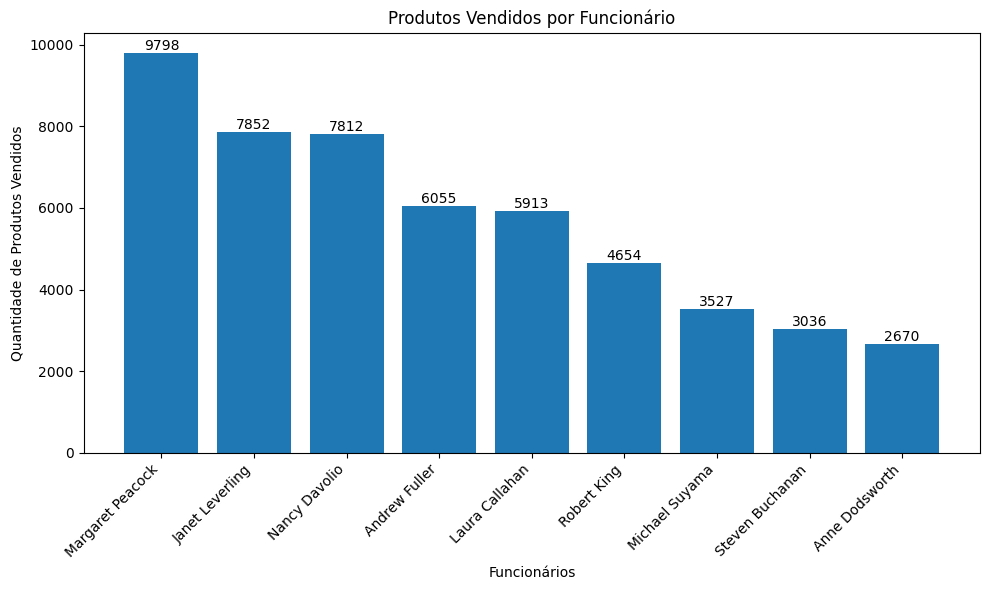

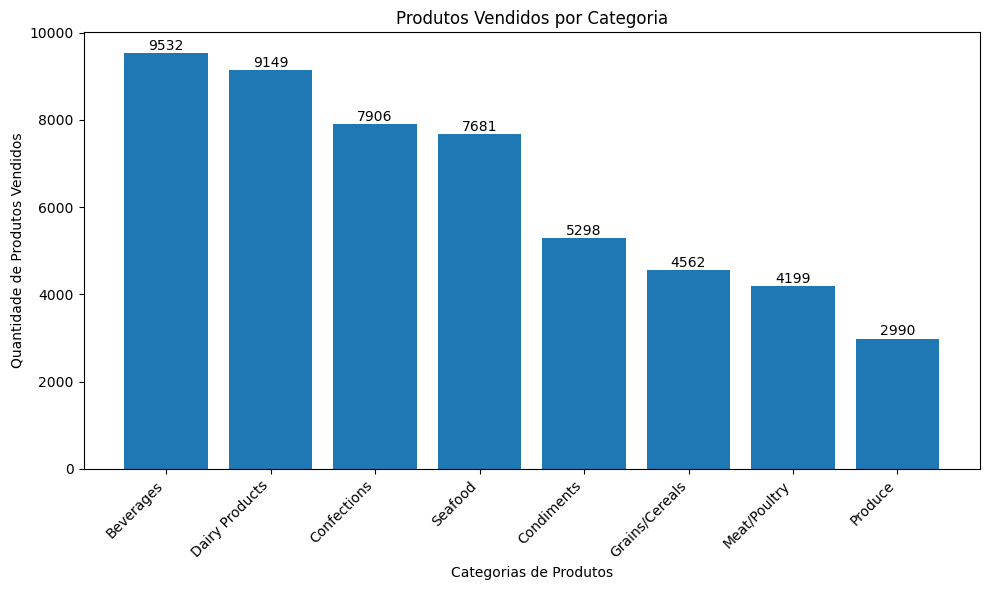

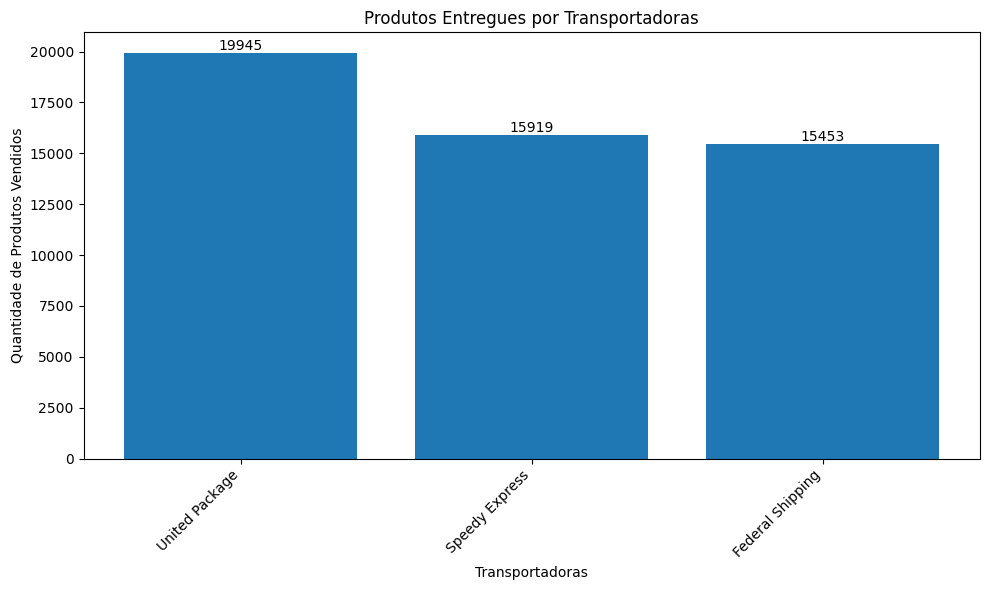

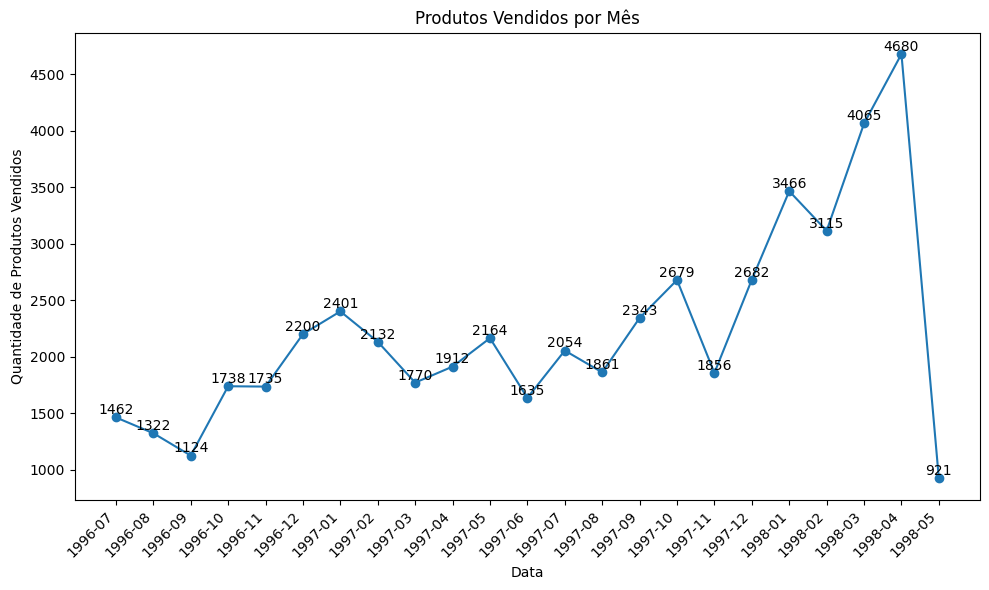

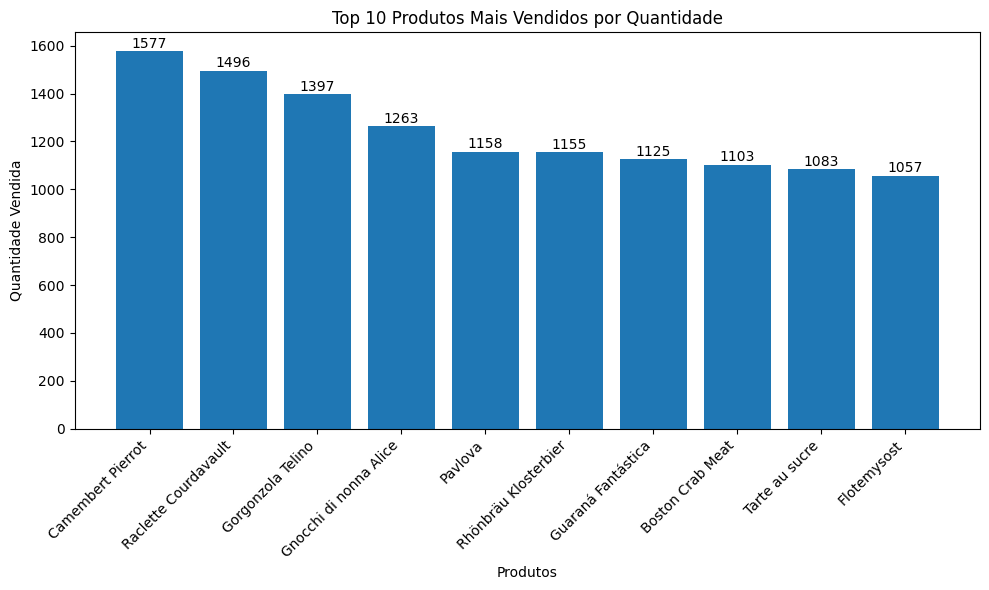

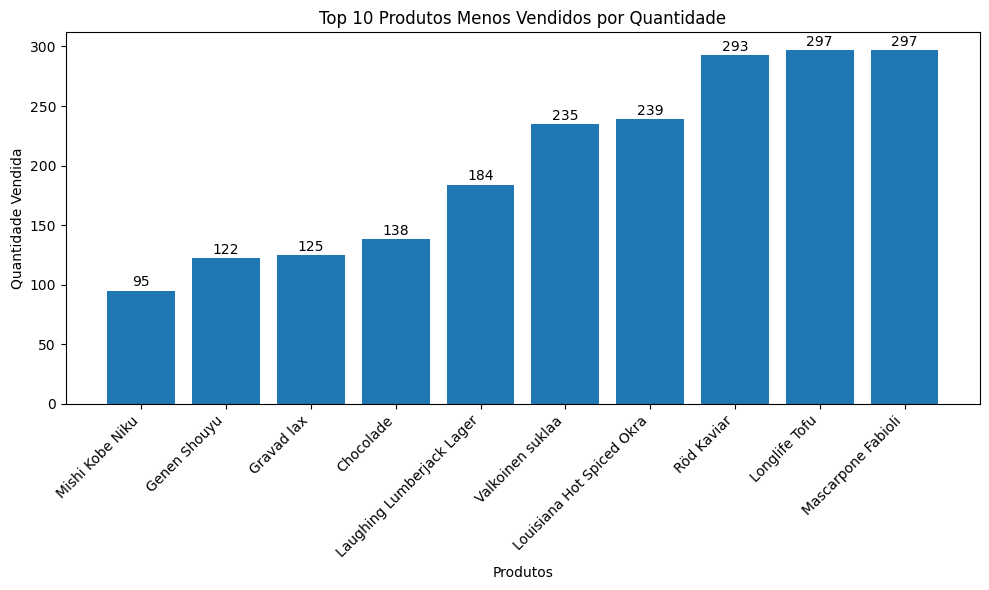

In [118]:
# Tabela de Produtos por Empregado
names = products_per_employee['first_name'] + ' ' + products_per_employee['last_name']
products_sold = products_per_employee['Produtos Vendidos']
plt.figure(figsize=(10, 6))
plt.bar(names, products_sold)
plt.xlabel('Funcionários')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.title('Produtos Vendidos por Funcionário')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(products_sold):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Produtos por Categoria de Produtos
categories = products_per_category['category_name']
products_sold = products_per_category['Produtos Vendidos']
plt.figure(figsize=(10, 6))
plt.bar(categories, products_sold)
plt.xlabel('Categorias de Produtos')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.title('Produtos Vendidos por Categoria')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(products_sold):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Produtos por Shippers
shippers = products_per_shipper['company_name']
products_sold = products_per_shipper['Produtos Vendidos']
plt.figure(figsize=(10, 6))
plt.bar(shippers, products_sold)
plt.xlabel('Transportadoras')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.title('Produtos Entregues por Transportadoras')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(products_sold):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Produtos por Ano/Mês
year_month = products_per_year_month['ano_mes'].astype(str)
products_sold = products_per_year_month['Produtos Vendidos']
plt.figure(figsize=(10, 6))
plt.plot(year_month, products_sold, marker='o')
plt.xlabel('Data')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.title('Produtos Vendidos por Mês')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(products_sold):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Produtos mais vendidos
top_products_names = top10_produtos_quantidade_nomes['product_name']
top_products_quantity = top10_produtos_quantidade_nomes['quantity']
plt.figure(figsize=(10, 6))
plt.bar(top_products_names, top_products_quantity)
plt.xlabel('Produtos')
plt.ylabel('Quantidade Vendida')
plt.title('Top 10 Produtos Mais Vendidos por Quantidade')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(top_products_quantity):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n")

#Tabela de Produtos menos vendidos
bot_products_names = bot10_produtos_quantidade_nomes['product_name']
bot_products_quantity = bot10_produtos_quantidade_nomes['quantity']
plt.figure(figsize=(10, 6))
plt.bar(bot_products_names, bot_products_quantity)
plt.xlabel('Produtos')
plt.ylabel('Quantidade Vendida')
plt.title('Top 10 Produtos Menos Vendidos por Quantidade')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(bot_products_quantity):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("\n\n\n")

# Gráfico dos indicadores de Faturamento

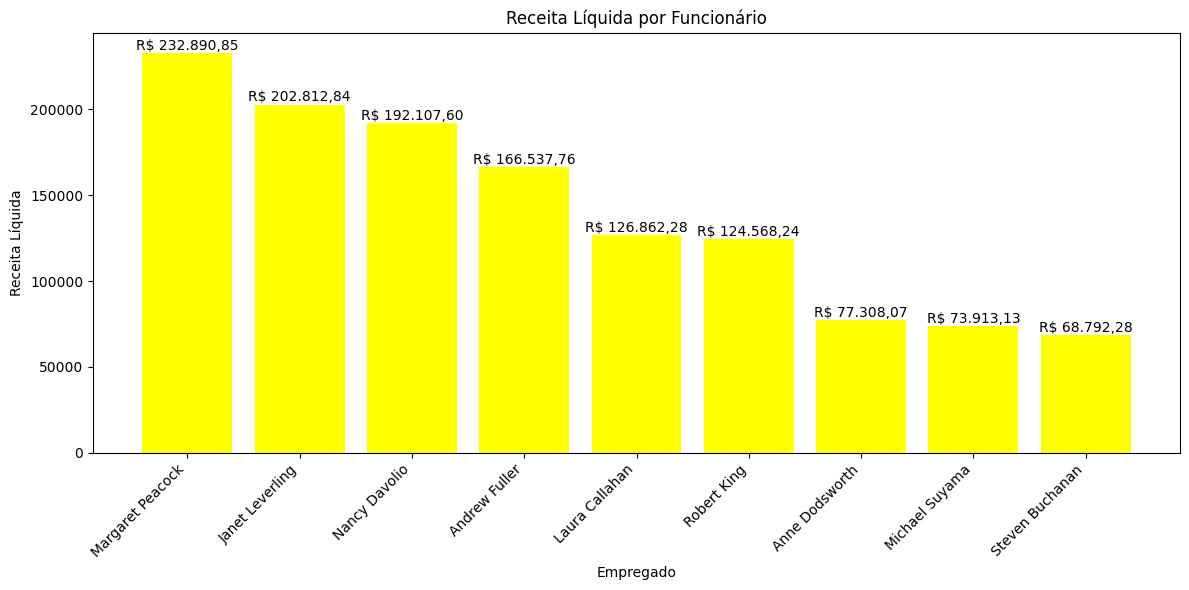

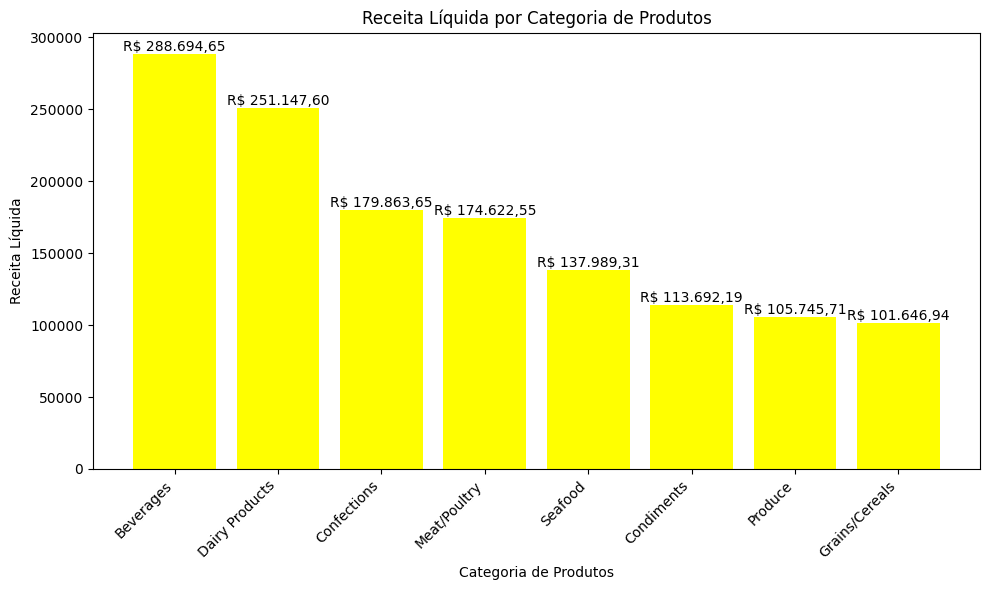

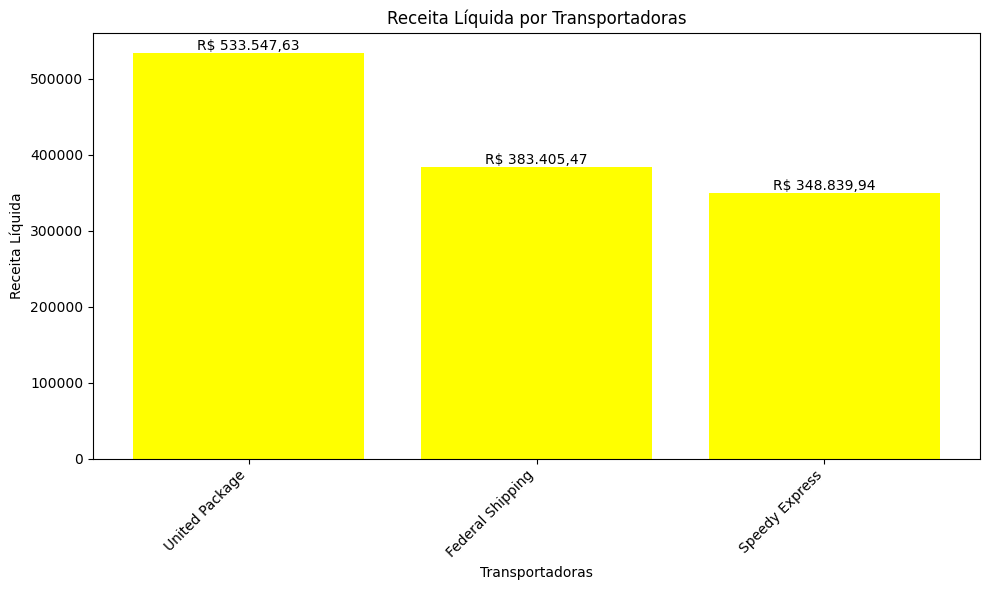

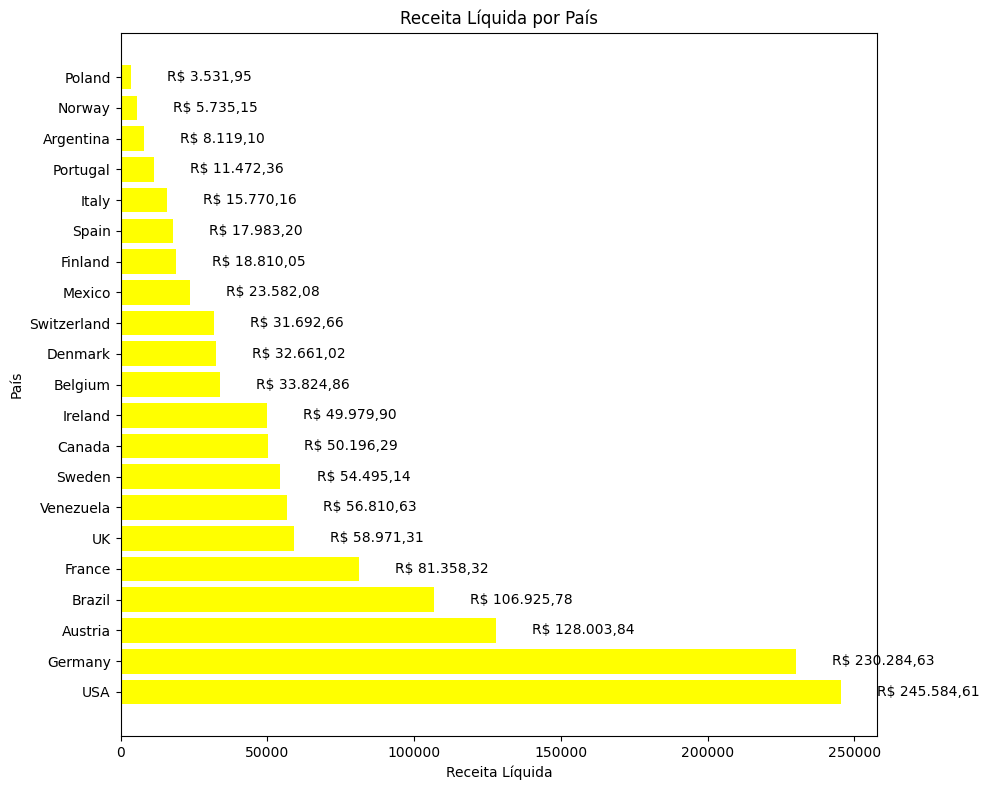

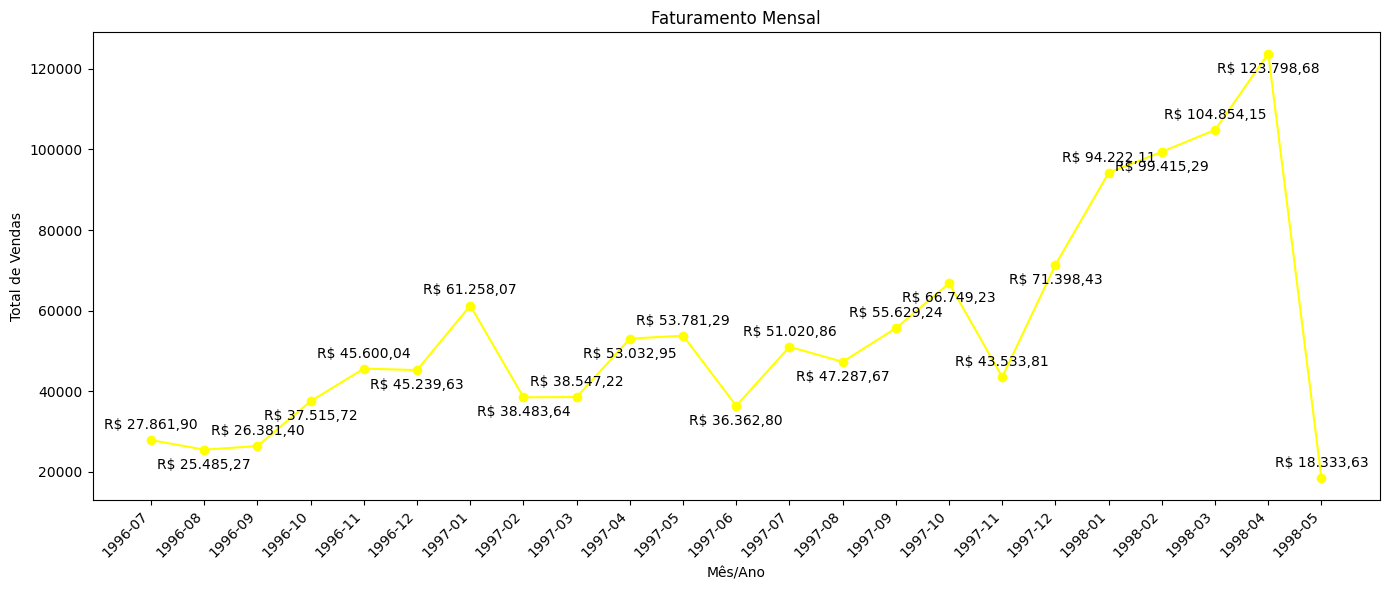

In [116]:
# locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Tabela de Faturamento Líquido por Empregado
employees = employee_sales['first_name'] + ' ' + employee_sales['last_name']
sales_employee = employee_sales['Venda Líquida']
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(employees, sales_employee, color='yellow')
for bar in bars:
    value = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, value + 1, format_currency_brazilian(value), ha='center', va='bottom')
ax.set_xlabel('Empregado')
ax.set_ylabel('Receita Líquida')
ax.set_title('Receita Líquida por Funcionário')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Faturamento Líquido por Categoria de Produtos
categories = category_sales['category_name']
sales_category = category_sales['Venda Líquida']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(categories, sales_category, color='yellow')
for bar in bars:
    value = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, value + 1, format_currency_brazilian(value), ha='center', va='bottom')
ax.set_xlabel('Categoria de Produtos')
ax.set_ylabel('Receita Líquida')
ax.set_title('Receita Líquida por Categoria de Produtos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Faturamento Líquido por Transportadoras
shippers = shipper_sales['company_name']
sales_shipper = shipper_sales['Venda Líquida']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(shippers, sales_shipper, color='yellow')
for bar in bars:
    value = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, value + 1, format_currency_brazilian(value), ha='center', va='bottom')
ax.set_xlabel('Transportadoras')
ax.set_ylabel('Receita Líquida')
ax.set_title('Receita Líquida por Transportadoras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Faturamento Líquido por País
countries = country_sales['country']
sales_country = country_sales['Venda Líquida']
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(countries, sales_country, color='yellow') 
for bar in bars:
    value = bar.get_width()
    ax.text(value + 0.05 * max(sales_country), bar.get_y() + bar.get_height() / 2, format_currency_brazilian(value), va='center')
ax.set_xlabel('Receita Líquida')
ax.set_ylabel('País')
ax.set_title('Receita Líquida por País')
plt.tight_layout()
plt.show()
print("\n\n")

# Tabela de Faturamento Líquido por mes
year_month = faturamento_mensal.index.astype(str)
total_sales_month = faturamento_mensal.values
plt.figure(figsize=(14, 6))
plt.plot(year_month, total_sales_month, marker='o', color='yellow')
plt.xlabel('Mês/Ano')
plt.ylabel('Total de Vendas')
plt.title('Faturamento Mensal')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(total_sales_month):
    if i % 2 == 0:
        plt.text(i, value + 2000, format_currency_brazilian(value), ha='center', va='bottom', color='black')
    else:  # Posições ímpares terão o texto mais acima
        plt.text(i, value - 2000, format_currency_brazilian(value), ha='center', va='top', color='black')
plt.tight_layout()
plt.show()
print("\n\n\n")

### A análise dos indicadores de desempenho da Northwind Traders oferece percepções valiosas sobre diversos aspectos do negócio, permitindo identificar oportunidades para melhorar os resultados da empresa. 
### Com base nos dados fornecidos, podem ser propostas as seguintes estratégias visando aprimorar os resultados da empresa:

### Foco na Eficiência da Equipe:
- Investir em treinamento e desenvolvimento da equipe, visando aumentar a performance dos colaboradores com menor desempenho.
- Reconhecer e recompensar os membros da equipe com melhor desempenho, incentivando a motivação e a produtividade.

### Ampliação da Oferta de Produtos:

- Explorar oportunidades de expansão da linha de produtos nas categorias mais lucrativas, como "Beverages", "Dairy Products" e "Confections".
- Avaliar a possibilidade de desenvolver produtos complementares aos mais vendidos para aumentar o valor médio do pedido.

### Estratégias de Marketing e Expansão:

- Investir em estratégias de marketing direcionadas para os países que geram as maiores receitas, como os EUA, Alemanha e Áustria.
- Explorar a possibilidade de expandir para outros países com bom potencial de vendas, como Brasil, França e Reino Unido.